In [1]:
import os
import sys; sys.path.insert(0, '..')
import seaborn as sns
import numpy as np
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
from struct_data import struct_data
from df_utils import df_wrapper, get_timestamp_and_pose
import pandas as pd

### Innhenting av sensordata og annoteringsdata, samt definering av globale variabler 

In [2]:
train_csv_f_name = "../../data/sensortest/data_martin_sensortest.csv"
train_annot_f_name = "../../data/annotation/martin_sensortest.txt"


POSE_MAP = {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}

In [3]:
knn_train = df_wrapper(train_csv_f_name)
knn_train.concat_sensor_data(3)
knn_train.df

Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  54078
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i][" TimeStamp (s)"] - df_time_offset


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.00,0.019920,-0.794387,-0.601370,-1.562904,-1.464186,-0.498630,-10.045666,-28.373941,-27.243652,...,-1.480040,-20.748009,-36.988220,41.428467,9.834142,-69.666298,0.747616,-0.335055,0.135482,0.557184
1,0.02,0.015635,-0.798804,-0.605099,-1.746947,-0.781661,-0.552266,-10.487769,-28.711199,-27.876856,...,-2.180673,-20.920061,-37.734138,41.424286,9.828160,-69.678291,0.747584,-0.334987,0.135538,0.557254
2,0.04,0.015153,-0.801027,-0.604974,-0.723603,0.261424,-0.555029,-10.635139,-28.458256,-26.610451,...,-2.239058,-20.461252,-36.868870,41.403576,9.871590,-69.696747,0.747453,-0.335022,0.135195,0.557491
3,0.06,0.020163,-0.797502,-0.608591,-0.445173,0.111246,-0.923887,-10.605668,-28.289625,-27.394417,...,-2.151479,-20.432577,-36.809200,41.417000,9.883158,-69.709579,0.747324,-0.335146,0.135219,0.557584
4,0.08,0.026463,-0.787940,-0.609870,-0.919388,-0.897010,-0.986847,-10.664613,-29.441923,-27.243652,...,-1.684391,-20.260525,-37.077728,41.419933,9.901683,-69.730927,0.747169,-0.335222,0.135169,0.557759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54073,1082.08,-0.702289,-0.091232,-0.677052,0.771323,-2.120086,2.219131,-40.315224,5.351791,-21.243278,...,-20.280336,22.322653,-37.734138,-20.050928,-10.376702,-71.308907,0.787686,0.192780,-0.028701,0.584435
54074,1082.10,-0.699011,-0.088285,-0.671266,-0.186748,-1.807720,4.439038,-40.433117,5.632840,-21.213129,...,-20.338724,22.724110,-38.002663,-19.996065,-10.342991,-71.331985,0.787711,0.192232,-0.028697,0.584581
54075,1082.12,-0.723239,-0.084772,-0.665240,0.148049,-2.638496,3.695276,-40.786804,5.773364,-21.786032,...,-20.835005,22.580734,-37.853477,-19.933832,-10.315112,-71.348053,0.787775,0.191664,-0.028603,0.584685
54076,1082.14,-0.722882,-0.090453,-0.662082,-0.800669,-4.035131,1.457107,-40.433117,5.155056,-20.790997,...,-20.864199,22.982191,-38.032505,-19.883596,-10.301021,-71.350899,0.787866,0.191250,-0.028450,0.584707


[[0.0, 123.32, 0], [125.24, 243.28, 1], [245.68, 362.24, 2], [366.72, 484.88, 3], [488.24, 602.08, 4], [605.2, 724.68, 5], [727.72, 842.28, 6], [846.84, 964.12, 7], [966.08, 1081.76, 8]]
Length of knn_train.df before drops: 54078
drops: 1254
length of knn_train.df after drops: 52824
52824
52824


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

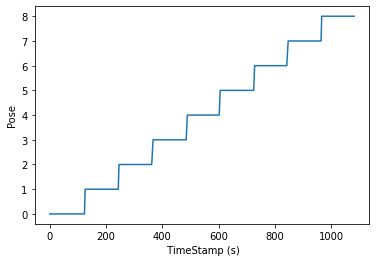

In [4]:
stamped_poses = get_timestamp_and_pose(train_annot_f_name, POSE_MAP)
print(stamped_poses)
print("Length of knn_train.df before drops: {}".format(len(knn_train.df.index)))
knn_train.align_poses(stamped_poses)

print(len(knn_train.df.index))
# print(len(df_stamped_poses))
y_train = knn_train.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train.df['SensorId'])

<AxesSubplot:xlabel='Pose', ylabel='Count'>

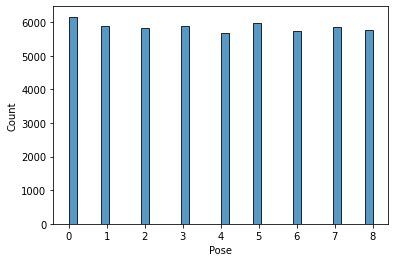

In [5]:
sns.histplot(data=y_train)

In [6]:

test_csv_f_name = "../../data/sensortest/martin_sensortest_nilsen.csv"
test_annot_f_name = "../../data/annotation/martin_sensortest_nilsen.txt"

knn_test = df_wrapper(test_csv_f_name)
knn_test.concat_sensor_data(3)
knn_test.df

Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  4602
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i][" TimeStamp (s)"] - df_time_offset


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.00,0.015310,-0.788833,-0.614601,-0.289234,0.148599,-0.033029,-9.839348,-28.458256,-28.027618,...,-1.071338,-17.708399,-38.867931,37.483280,10.758442,-132.375031,-0.353097,0.210372,-0.256812,-0.874708
1,0.02,0.016988,-0.793990,-0.618397,-1.066031,2.228461,0.906500,-9.603559,-26.743862,-28.329145,...,-0.721022,-18.281912,-38.748581,37.483467,10.769194,-132.347015,-0.353279,0.210515,-0.256723,-0.874626
2,0.04,0.016548,-0.778584,-0.619201,0.402291,2.340249,1.330297,-9.397241,-27.924265,-27.364267,...,-1.100532,-18.167210,-39.136456,37.473198,10.791303,-132.299423,-0.353598,0.210754,-0.256479,-0.874511
3,0.06,0.016636,-0.779548,-0.616585,-1.681398,2.340109,0.459941,-9.721454,-27.109226,-28.057776,...,-0.983759,-17.966480,-39.136456,37.457188,10.839692,-132.248672,-0.353876,0.211177,-0.256090,-0.874411
4,0.08,0.018946,-0.789322,-0.622949,-1.797317,1.478723,0.090666,-9.691978,-28.036684,-27.937162,...,-1.042145,-17.966480,-38.957439,37.465382,10.898922,-132.218246,-0.353923,0.211709,-0.255885,-0.874323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,91.94,0.120100,-0.493723,-0.858217,10.623210,19.655279,-8.492423,-6.715131,-18.846420,-36.168831,...,5.964177,-9.851303,-42.478168,25.890158,21.628696,-126.950310,-0.389899,0.261877,-0.115215,-0.875285
4598,91.96,0.126508,-0.493604,-0.839787,11.495259,19.904470,-9.395234,-6.449863,-18.509165,-35.987907,...,6.694001,-11.055676,-43.104736,26.183422,21.653545,-126.894440,-0.389593,0.263113,-0.117226,-0.874784
4599,91.98,0.141890,-0.512598,-0.846178,9.437231,16.525085,-8.950869,-6.066706,-18.565372,-36.379890,...,6.372879,-11.715213,-43.134571,26.445723,21.708185,-126.830879,-0.389340,0.264469,-0.118859,-0.874267
4600,92.00,0.148199,-0.524692,-0.842576,10.974522,20.330591,-6.262592,-5.830916,-18.256224,-36.319592,...,6.372879,-10.711570,-42.716862,26.744068,21.763510,-126.739693,-0.389208,0.265981,-0.120698,-0.873615


[[0.0, 10.2, 0], [11.32, 19.96, 1], [20.64, 29.88, 2], [31.12, 40.64, 3], [41.96, 49.96, 4], [51.12, 60.0, 5], [61.32, 70.36, 6], [72.08, 80.28, 7], [81.32, 90.2, 8]]
drops: 563
length of knn_train.df after drops: 4039
4039


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

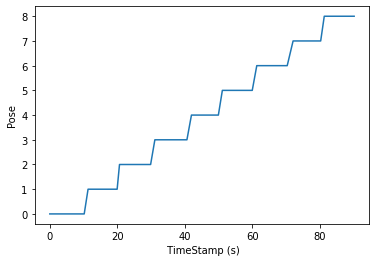

In [7]:
s_poses = get_timestamp_and_pose(test_annot_f_name, POSE_MAP)

print(s_poses)
knn_test.align_poses(s_poses)

y_test = knn_test.df["Pose"]  # df_test["Pose"]

sns.lineplot(data=knn_test.df, x=" TimeStamp (s)", y='Pose')

In [8]:
x_train = knn_train.df.drop([' TimeStamp (s)', 'Pose'],axis=1)
x_test = knn_test.df.drop([' TimeStamp (s)', 'Pose'], axis=1) 


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(52824, 48)
(52824,)
(4039, 48)


### Splitter csv-filene opp i 3 dataframes med henholdsvis SensorId 1, 2 og 3. 

In [9]:

"""
knn_train = struct_data(train_csv_f_name, train_annot_f_name, POSE_MAP)

knn_train.split_mult_sensor_data(3)
offsets = knn_train.fix_offsets()

df_train_id1 = knn_train.df_arr[0]
df_train_id2 = knn_train.df_arr[1]
df_train_id3 = knn_train.df_arr[2]"""


'\nknn_train = struct_data(train_csv_f_name, train_annot_f_name, POSE_MAP)\n\nknn_train.split_mult_sensor_data(3)\noffsets = knn_train.fix_offsets()\n\ndf_train_id1 = knn_train.df_arr[0]\ndf_train_id2 = knn_train.df_arr[1]\ndf_train_id3 = knn_train.df_arr[2]'

### Visualiserer de tre dataframene

In [10]:
#df_train_id1

In [11]:
#df_train_id2

In [12]:
# df_train_id3

### Dropper kolonner vi ikke trenger og printer ut shapes

In [13]:
"""
df_train_id1 = df_train_id1.drop(['SensorId',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)
df_train_id2 = df_train_id2.drop(['SensorId',' TimeStamp (s)',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)
df_train_id3 = df_train_id3.drop(['SensorId',' TimeStamp (s)',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)
"""

"\ndf_train_id1 = df_train_id1.drop(['SensorId',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)\ndf_train_id2 = df_train_id2.drop(['SensorId',' TimeStamp (s)',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)\ndf_train_id3 = df_train_id3.drop(['SensorId',' TimeStamp (s)',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)\n"

In [14]:
"""
print(df_train_id1.shape)
print(df_train_id2.shape)
print(df_train_id3.shape)
"""

'\nprint(df_train_id1.shape)\nprint(df_train_id2.shape)\nprint(df_train_id3.shape)\n'

### Finn den sensoren som har sendt minst data, og endre de andre til å være like lange og ha samme indeksering

Nb! Her burde det bli nevnt at dette gir en viss unøyaktighet. Vi er bevisst på dette, men vi har gjort alt
vi kan for å prøve begrense dette. Med en sendingsfrekvens på 50Hz (senket ned fra 100), sensorer er synkronisert
gjennom LPMS Control før start, alle enheter rundt har av bluetooth og det er ikke lang avstand den må sende dataen.
Batteriene er også relativt fullt oppladet før vi har samlet data. Allikevel mistet vi omtrent 40 datapunkter fra
den som hadde sendt mest til den som hadde sendt minst. Dette er dog kun omtrent 0,075% av rett i overkant av 54000
punkter per sensor (18min). Derfor tenker vi at vi kan droppe de siste som er mottat og legge de sammen basert på ny
indeksering, da dette er eneste muligheten vi har til å klassifisere på flere sensorer. Det er en bitteliten unøyaktighet
vi hverken kan fjerne (ideelt sender alle sensorene eksakt like mye data konstant - noen frames blir mistet på veien), og
vi satser på og tror ikke skal ha så stor effekt. 

In [15]:
"""
def find_min_df(*args):
    smallest_df = args[0]
    for df in args:
        if len(df.index) < len(smallest_df.index):
            smallest_df = df
    return smallest_df, len(smallest_df)
"""

In [16]:
"""
_, length_of_min_df = find_min_df(df_train_id1, df_train_id2, df_train_id3)

dfs = [df_train_id1, df_train_id2, df_train_id3]
for i in range(len(dfs)):
    dfs[i] = dfs[i].iloc[:length_of_min_df]
    dfs[i].index = [i for i in range(length_of_min_df)]

print(df_train_)
print(df_train_id1.index[-1])
"""



'\n_, length_of_min_df = find_min_df(df_train_id1, df_train_id2, df_train_id3)\n\ndfs = [df_train_id1, df_train_id2, df_train_id3]\nfor i in range(len(dfs)):\n    dfs[i] = dfs[i].iloc[:length_of_min_df]\n    dfs[i].index = [i for i in range(length_of_min_df)]\n\nprint(df_train_)\nprint(df_train_id1.index[-1])\n'

In [17]:
"""
df_train_id2 = df_train_id2.iloc[:len(df_train_id1)]
df_train_id3 = df_train_id3.iloc[:len(df_train_id1)]

min_len = len(df_train_id1.index)
df_train_id1.index = [i for i in range(min_len)]
df_train_id2.index = [i for i in range(min_len)]
df_train_id3.index = [i for i in range(min_len)]


df_train = pd.concat([df_train_id1, df_train_id2, df_train_id3], axis=1)
"""

'\ndf_train_id2 = df_train_id2.iloc[:len(df_train_id1)]\ndf_train_id3 = df_train_id3.iloc[:len(df_train_id1)]\n\nmin_len = len(df_train_id1.index)\ndf_train_id1.index = [i for i in range(min_len)]\ndf_train_id2.index = [i for i in range(min_len)]\ndf_train_id3.index = [i for i in range(min_len)]\n\n\ndf_train = pd.concat([df_train_id1, df_train_id2, df_train_id3], axis=1)\n'

In [18]:
"""
print(df_train_id1.shape)
print(df_train_id2.shape)
print(df_train_id3.shape)
"""

'\nprint(df_train_id1.shape)\nprint(df_train_id2.shape)\nprint(df_train_id3.shape)\n'

In [19]:
#df_train

### Test

In [20]:
"""
knn_test = struct_data(test_csv_f_name, test_annot_f_name, POSE_MAP)

#df_train = knn_train.df

knn_test.split_mult_sensor_data(3)
offsets = knn_test.fix_offsets()
# print(offsets)
# print(knn_train.df_arr[0])
# print(knn_train.df_arr[1])

df_test_id1 = knn_test.df_arr[0]
df_test_id2 = knn_test.df_arr[1]
df_test_id3 = knn_test.df_arr[2]"""

'\nknn_test = struct_data(test_csv_f_name, test_annot_f_name, POSE_MAP)\n\n#df_train = knn_train.df\n\nknn_test.split_mult_sensor_data(3)\noffsets = knn_test.fix_offsets()\n# print(offsets)\n# print(knn_train.df_arr[0])\n# print(knn_train.df_arr[1])\n\ndf_test_id1 = knn_test.df_arr[0]\ndf_test_id2 = knn_test.df_arr[1]\ndf_test_id3 = knn_test.df_arr[2]'

In [21]:
#df_test_id1

In [22]:
#df_test_id2

In [23]:
#df_test_id3

In [24]:
"""df_test_id1 = df_test_id1.drop(['SensorId',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)
df_test_id2 = df_test_id2.drop(['SensorId',' TimeStamp (s)',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)
df_test_id3 = df_test_id3.drop(['SensorId',' TimeStamp (s)',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)"""

"df_test_id1 = df_test_id1.drop(['SensorId',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)\ndf_test_id2 = df_test_id2.drop(['SensorId',' TimeStamp (s)',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)\ndf_test_id3 = df_test_id3.drop(['SensorId',' TimeStamp (s)',' FrameNumber',' LinAccX (g)',' LinAccY (g)',' LinAccZ (g)',' Pressure (kPa)',' Altitude (m)',' Temperature (degC)',' HeaveMotion (m)'],axis=1)"

In [25]:
#print(df_test_id1.shape)
#print(df_test_id2.shape)
#print(df_test_id3.shape)

In [26]:
"""df_test_id1 = df_test_id1.iloc[:len(df_test_id2)]
df_test_id3 = df_test_id3.iloc[:len(df_test_id2)]

min_len = len(df_test_id2.index)
df_test_id1.index = [i for i in range(min_len)]
df_test_id2.index = [i for i in range(min_len)]
df_test_id3.index = [i for i in range(min_len)]
df_test = pd.concat([df_test_id1, df_test_id2, df_test_id3], axis=1)"""

'df_test_id1 = df_test_id1.iloc[:len(df_test_id2)]\ndf_test_id3 = df_test_id3.iloc[:len(df_test_id2)]\n\nmin_len = len(df_test_id2.index)\ndf_test_id1.index = [i for i in range(min_len)]\ndf_test_id2.index = [i for i in range(min_len)]\ndf_test_id3.index = [i for i in range(min_len)]\ndf_test = pd.concat([df_test_id1, df_test_id2, df_test_id3], axis=1)'

In [27]:
#df_test

In [28]:
#print(df_test_id1.shape)
#print(df_test_id2.shape)
#print(df_test_id3.shape)

In [29]:
"""stamped_poses_train = knn_train.get_timestamp_and_pose()
print(stamped_poses_train)
df_train_res, df_stamped_poses_train = knn_train.align_poses_2(df_train,stamped_poses_train)

stamped_poses_test = knn_test.get_timestamp_and_pose()
print(stamped_poses_test)
df_test_res, df_stamped_poses_test = knn_test.align_poses_2(df_test,stamped_poses_test)
y_test = df_stamped_poses_test
"""

'stamped_poses_train = knn_train.get_timestamp_and_pose()\nprint(stamped_poses_train)\ndf_train_res, df_stamped_poses_train = knn_train.align_poses_2(df_train,stamped_poses_train)\n\nstamped_poses_test = knn_test.get_timestamp_and_pose()\nprint(stamped_poses_test)\ndf_test_res, df_stamped_poses_test = knn_test.align_poses_2(df_test,stamped_poses_test)\ny_test = df_stamped_poses_test\n'

In [30]:
#sns.lineplot(data=df_train_res,x=' TimeStamp (s)',y='Pose')

In [31]:
#sns.lineplot(data=df_test_res,x=' TimeStamp (s)',y='Pose')

In [32]:
#y_train = df_train_res["Pose"]
#x_train = df_train_res.drop([' TimeStamp (s)'],axis=1)

In [33]:
#x_test = df_test_res.drop([' TimeStamp (s)'],axis=1)

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#n_estimators_lst = [i for i in range(1, 200)]
#parameters = {'n_estimators':n_estimators_lst} 
#rfc = RandomForestClassifier(random_state=69)
#clf = GridSearchCV(rfc, parameters, n_jobs=-1)
#clf.fit(x_train, y_train)
pipe = make_pipeline(RandomForestClassifier(n_estimators=13, random_state=69))
pipe.fit(x_train,y_train)
predictions = pipe.predict(x_test)

#pipe = make_pipeline(KNeighborsClassifier(n_neighbors=1))
#pipe.fit(x_train, y_train)
#predictions = pipe.predict(x_test)

#rfc.fit(x_train,y_train)
#predictions = clf.predict(x_test)

#mlp = MLPClassifier(activation='relu', random_state=69)
#mlp.fit(x_train,y_train)
#predictions = mlp.predict(x_test)


In [35]:
#clf.best_params_


<AxesSubplot:xlabel='x', ylabel='y'>

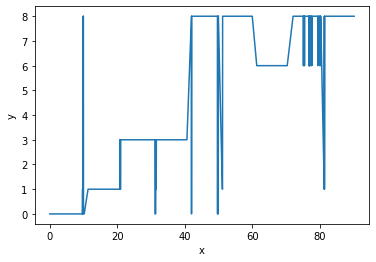

In [36]:
df_predict = pd.DataFrame({'x': knn_test.df[' TimeStamp (s)'],'y':predictions})
sns.lineplot(data=df_predict,x='x',y='y')

In [37]:
number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test.iloc[num]):
        number_of_corrects += 1



print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects/len(predictions)*100))

number of correct: 2288
number of guesses: 4039
% correct: 56.64768507056201


In [38]:
"""
#df_train_id1 = df_train[df_train['SensorId']==1]
#df_train_id2 = df_train[df_train['SensorId']==2]
#df_train_id3 = df_train[df_train['SensorId']==3]

#timestamp_offset_1 = df_train_id1[' TimeStamp (s)'].iloc[0]
#df_train_id1[' TimeStamp (s)'] = df_train_id1[' TimeStamp (s)'] - timestamp_offset_1

#timestamp_offset_2 = df_train_id2[' TimeStamp (s)'].iloc[0]
#df_train_id2[' TimeStamp (s)'] = round(df_train_id2[' TimeStamp (s)'] - timestamp_offset_2, 2)

#timestamp_offset_3 = df_train_id3[' TimeStamp (s)'].iloc[0]
#df_train_id3[' TimeStamp (s)'] = round(df_train_id3[' TimeStamp (s)'] - timestamp_offset_3, 2)

# knn_train.split_mult_sensor_data(2)
#df_train_id1 = knn_train.df_arr[0]
# df_train_id1


stamped_poses = knn_train.get_timestamp_and_pose()
print(stamped_poses)

df_train, df_stamped_poses = knn_train.align_poses(stamped_poses)

print(len(knn_train.df.index))
# print(len(df_stamped_poses))
y_train = knn_train.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=df_train, x=" TimeStamp (s)", y='Pose')
sns.histplot(data=df_train['SensorId'])

print(y_train)
print(len(y_train))



csv_file = "../../data/test_data/Simon_test_1.csv"
annot_file = "../../data/annotation/Simon_test_1.txt"

csv_file = "../../data/test_data/martin_test_2sensorer.csv"
annot_file = "../../data/annotation/martin_test_2_sensor.txt"


knn_test = struct_data(csv_file, annot_file, POSE_MAP)
s_poses = knn_test.get_timestamp_and_pose()
print(s_poses)
df_test, df_stamped_poses = knn_test.align_poses(s_poses)

y_test = df_stamped_poses  # df_test["Pose"]

sns.histplot(data=df_test['SensorId'])

x_test = df_test.drop([' TimeStamp (s)'], axis=1)
#x_test = x_test.drop(['Pose'],axis=1)
x_test = x_test.drop(['Pose', ' FrameNumber', ' LinAccX (g)', ' LinAccY (g)', ' MagX (uT)', ' MagY (uT)', ' MagZ (uT)',
                      ' LinAccZ (g)', ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)', ' HeaveMotion (m)'], axis=1)
x_test

sns.histplot(x_train['SensorId'])

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

#x_train = x_train.drop(['SensorId'], axis=1)
#x_test = x_test.drop(['SensorId'], axis=1)
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
#neigh = KNeighborsClassifier(n_neighbors=1)
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_test)

df_predict = pd.DataFrame({'x': df_test[' TimeStamp (s)'], 'y': predictions})
sns.lineplot(data=df_predict, x='x', y='y')

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

sns.heatmap(confusion_matrix(y_test, predictions),
            cmap="YlGnBu", annot=True, fmt="d")

number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects / len(predictions) * 100))

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-38-1178e8e70385>, line 88)

In [ ]:
"""
for num in range(len(predictions)):
    print(predictions[num])
"""

"""
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
k = 1
accuracy_array = []
k_array = []
for num in range(20):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    predictions = neigh.predict(x_test)
    number_of_corrects = 0
    print(y_test[1200:1230])
   
    for n in range(len(predictions)):
        if(predictions[n] == y_test[n]):
            number_of_corrects += 1
    print("number of correct: {}".format(number_of_corrects))
    print("number of guesses: {}".format(len(predictions)))
    print("% correct: {}".format(number_of_corrects/len(predictions)*100))
    accuracy_array.append(number_of_corrects/len(predictions)*100)
    k_array.append(k)
    print("K: {}".format(k))
    k += 1
    print(accuracy_array)
    print(k_array)
resframe = pd.DataFrame({'k':k_array, '%':accuracy_array})
resframe
    
sns.lineplot(data=resframe,x="k",y="%")
"""

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d486bc-e14d-4632-9064-12272fc72d11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>